In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
original=pd.read_excel('train.xlsx')

In [12]:
original.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [13]:
original.shape

(54808, 14)

In [14]:
df=original.copy()

In [15]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [16]:
# cheking null value 

In [17]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [18]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<AxesSubplot:>

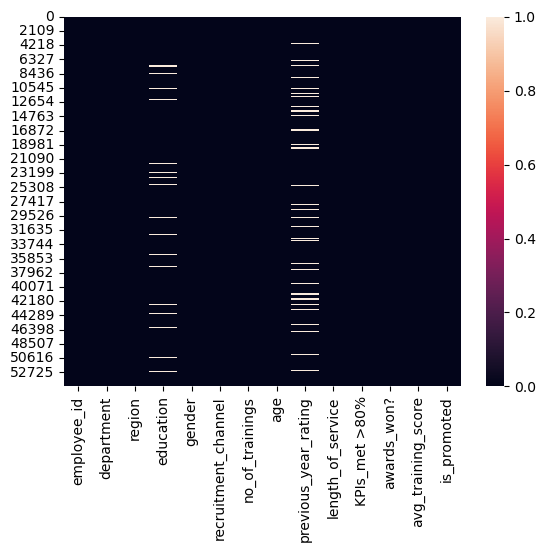

In [20]:
sns.heatmap(df.isnull())

In [21]:
# Not large null value so we fill with mean medium and mode 

In [22]:
df['education'].fillna(df['education'].mode(),inplace=True)

In [23]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(),inplace=True)

In [24]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [25]:
# checking unique value 

In [26]:
column=df.columns

In [27]:
for column in column:
    print(f'{column}:{df[column].unique()}')

employee_id:[65438 65141  7513 ... 13918 13614 51526]
department:['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region:['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education:["Master's & above" "Bachelor's" nan 'Below Secondary']
gender:['f' 'm']
recruitment_channel:['sourcing' 'other' 'referred']
no_of_trainings:[ 1  2  3  4  7  5  6  8 10  9]
age:[35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating:[5. 3. 1. 4. 2.]
length_of_service:[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 

In [28]:
# Education contain nan value so we drop 

In [29]:
df=df.dropna(axis=0)

<AxesSubplot:>

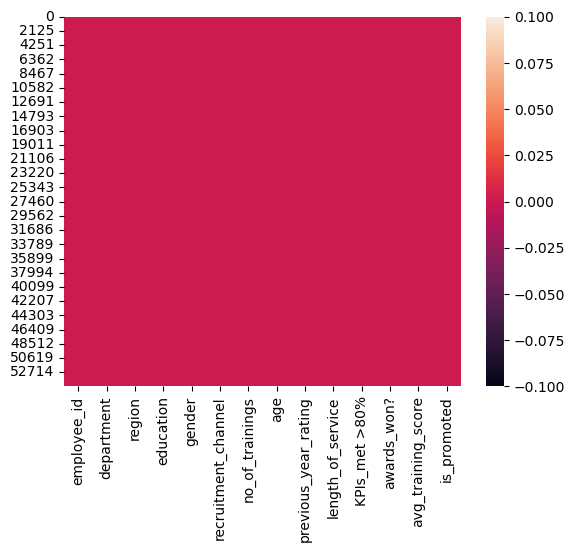

In [30]:
sns.heatmap(df.isnull())

In [31]:
# No null value and no unique value 

In [32]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [33]:
df.shape

(52399, 14)

In [34]:
# EDA part 

In [35]:
df_num=list(df.select_dtypes(exclude=object))

In [36]:
df_num

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

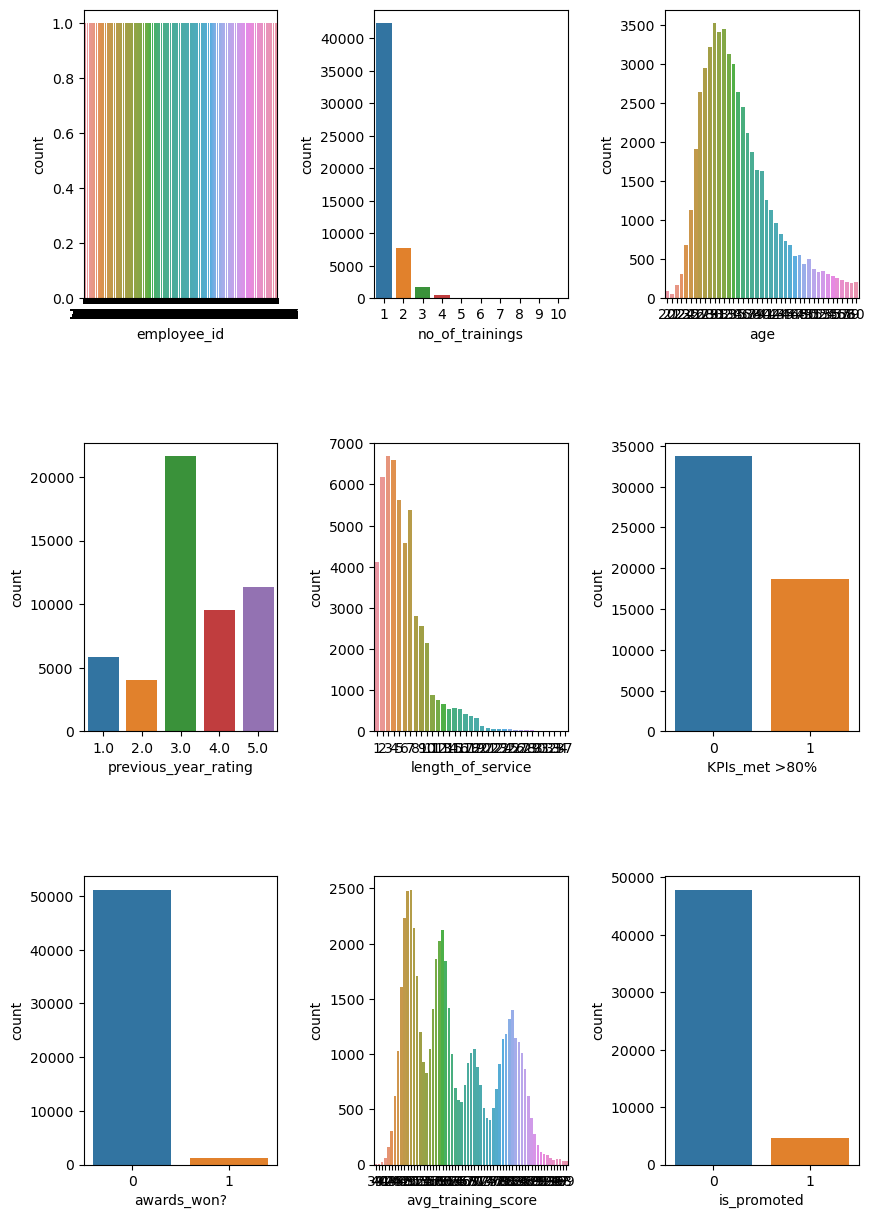

In [85]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=0.5,wspace=.5)
for i in range(len(df_col)):
    plt.subplot(3,3,i+1)
    sns.countplot(df[df_num[i]])

In [37]:
df.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


<AxesSubplot:xlabel='gender', ylabel='count'>

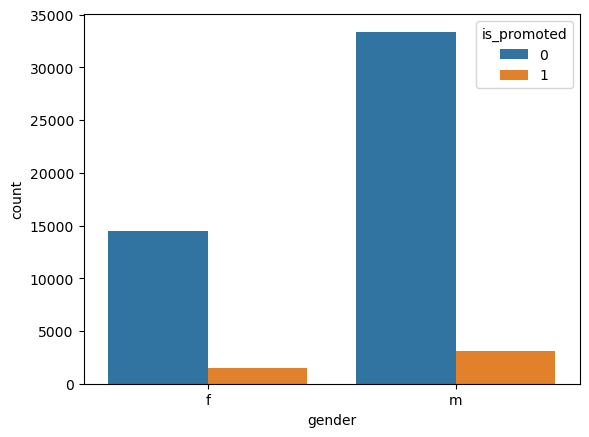

In [38]:
sns.countplot(data=df,x='gender',hue='is_promoted')

<AxesSubplot:xlabel='department', ylabel='count'>

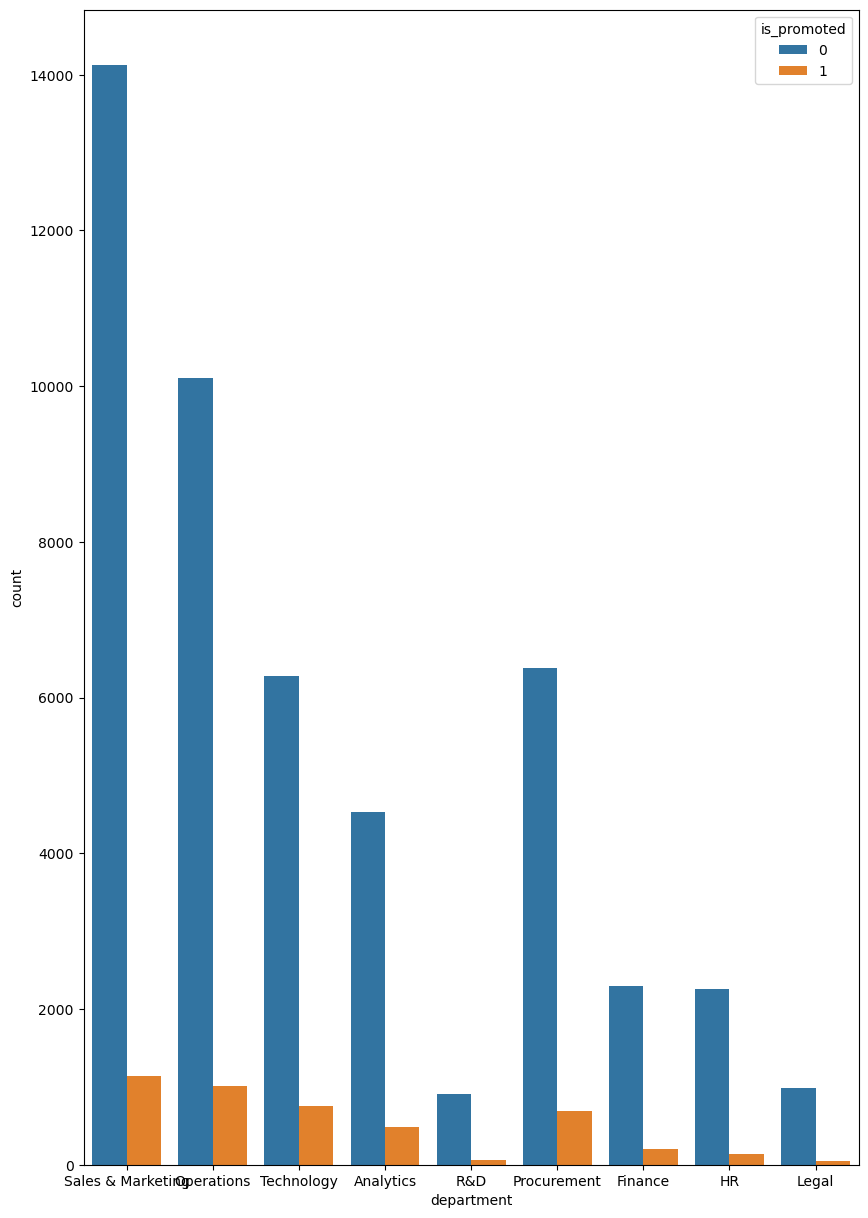

In [39]:
plt.figure(figsize=(10,15))
sns.countplot(data=df,x='department',hue='is_promoted')

In [40]:
# Large number of promotion in sale and operation 

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

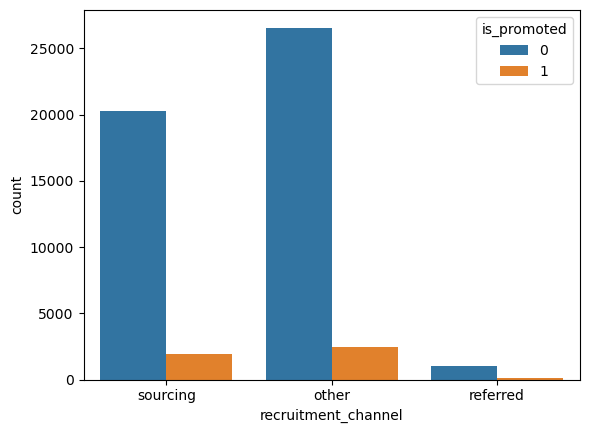

In [41]:
sns.countplot(data=df,x='recruitment_channel',hue='is_promoted')

<AxesSubplot:xlabel='education', ylabel='count'>

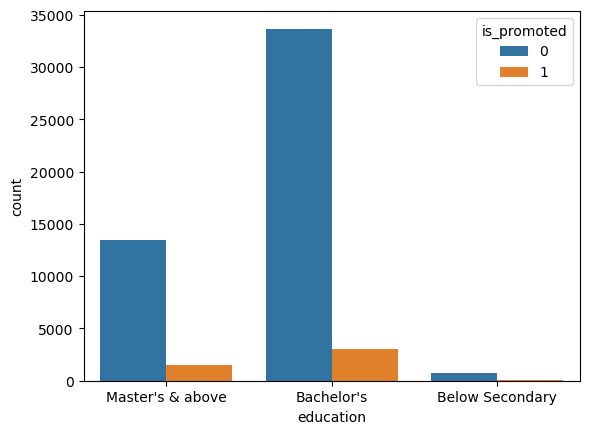

In [42]:
sns.countplot(data=df,x='education',hue='is_promoted')

In [43]:
# Large number of promotion in bachlore

<AxesSubplot:xlabel='length_of_service', ylabel='count'>

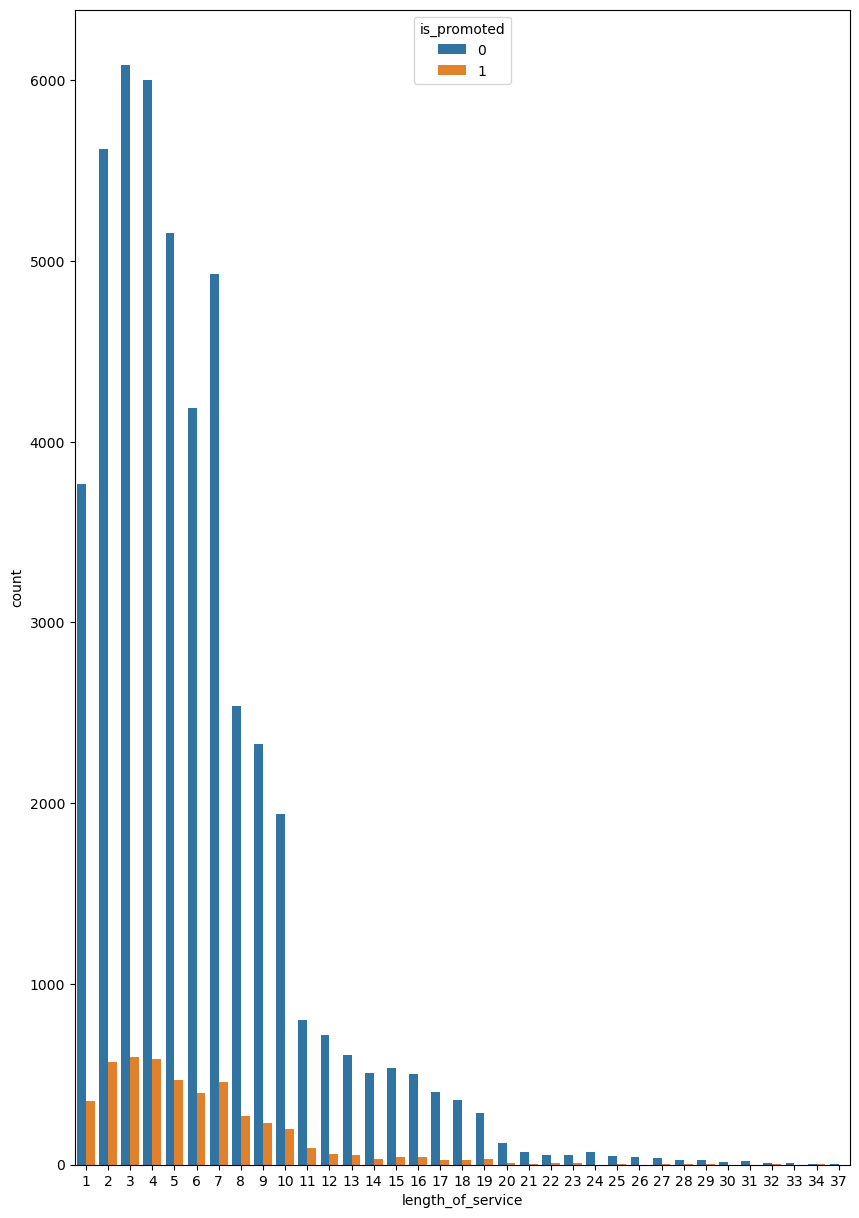

In [44]:
plt.figure(figsize=(10,15))
sns.countplot(data=df,x='length_of_service',hue='is_promoted')

In [45]:
# new employe getting high promotion 

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

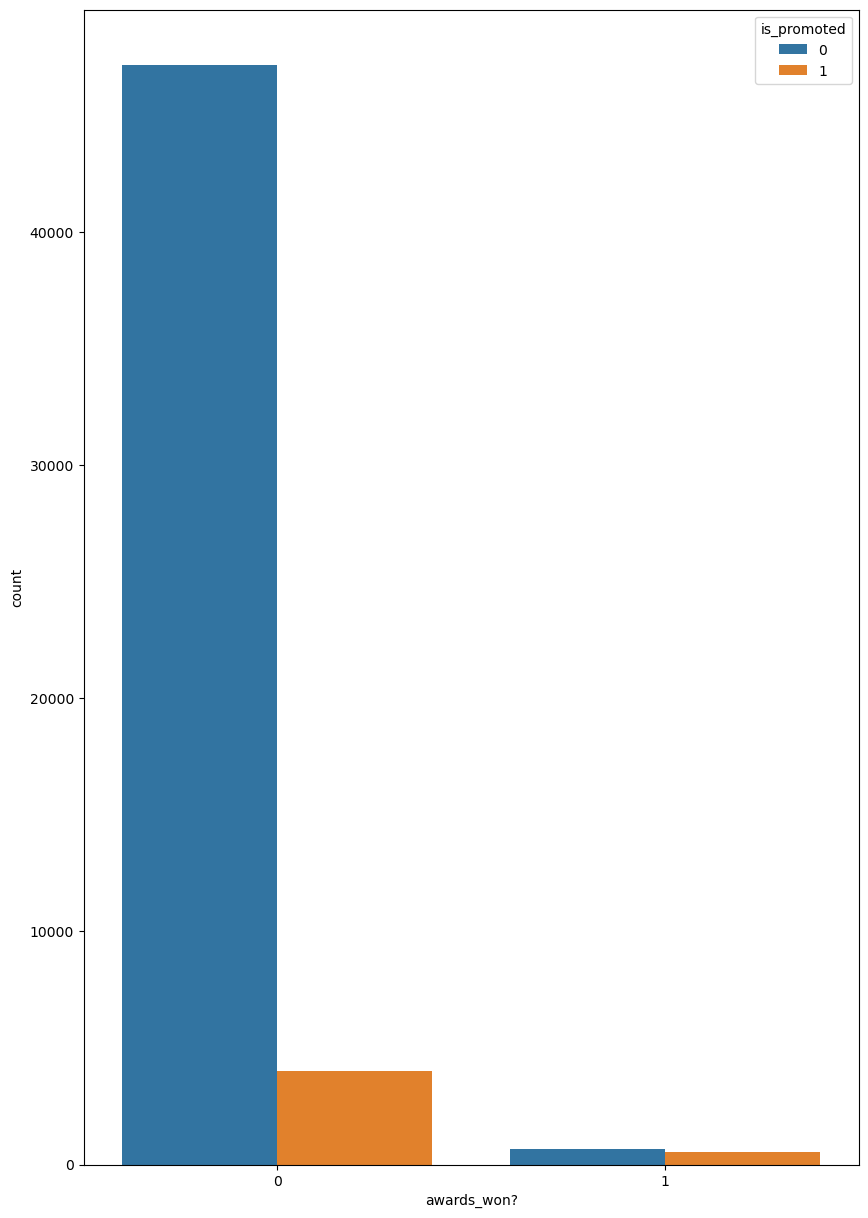

In [46]:
plt.figure(figsize=(10,15))
sns.countplot(data=df,x='awards_won?',hue='is_promoted')

In [47]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [48]:
# Checking Correlation 

In [49]:
corr=df.corr()

<AxesSubplot:>

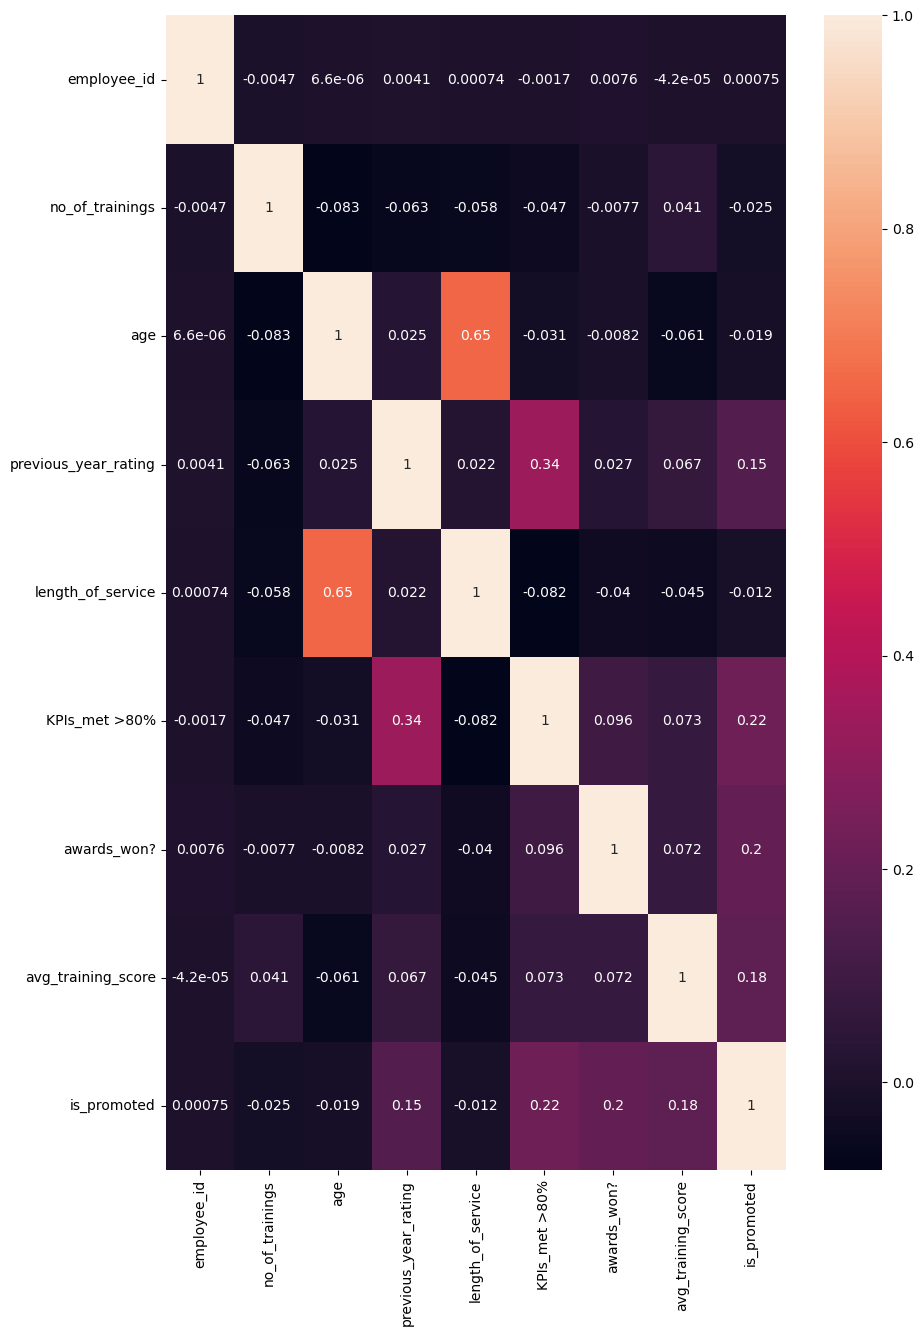

In [50]:
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=True)

In [51]:
# There is no High correlation 

In [52]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           52399 non-null  int64  
 1   department            52399 non-null  object 
 2   region                52399 non-null  object 
 3   education             52399 non-null  object 
 4   gender                52399 non-null  object 
 5   recruitment_channel   52399 non-null  object 
 6   no_of_trainings       52399 non-null  int64  
 7   age                   52399 non-null  int64  
 8   previous_year_rating  52399 non-null  float64
 9   length_of_service     52399 non-null  int64  
 10  KPIs_met >80%         52399 non-null  int64  
 11  awards_won?           52399 non-null  int64  
 12  avg_training_score    52399 non-null  int64  
 13  is_promoted           52399 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 6.0+ MB


In [54]:
df['is_promoted'].value_counts()

0    47853
1     4546
Name: is_promoted, dtype: int64

In [55]:
# Lebel Encoding 

In [56]:
df=df.drop(['employee_id'],axis=1)

In [57]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [58]:
df=pd.get_dummies(df,drop_first=True)

In [59]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               52399 non-null  int64  
 1   age                           52399 non-null  int64  
 2   previous_year_rating          52399 non-null  float64
 3   length_of_service             52399 non-null  int64  
 4   KPIs_met >80%                 52399 non-null  int64  
 5   awards_won?                   52399 non-null  int64  
 6   avg_training_score            52399 non-null  int64  
 7   is_promoted                   52399 non-null  int64  
 8   department_Finance            52399 non-null  uint8  
 9   department_HR                 52399 non-null  uint8  
 10  department_Legal              52399 non-null  uint8  
 11  department_Operations         52399 non-null  uint8  
 12  department_Procurement        52399 non-null  uint8  
 13  d

In [61]:
x=df.drop(['is_promoted'],axis=1)
y=df['is_promoted']

In [62]:
# Scaling the data 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()
model=sc.fit(x)
x_scaled=model.transform(x)
print(x_scaled)

[[-0.41764351  0.00259504  1.38776157 ... -1.51366698 -0.14872913
   1.16614326]
 [-0.41764351 -0.65366667  1.38776157 ...  0.6606473  -0.14872913
  -0.85752757]
 [-0.41764351 -0.1286573  -0.25791065 ...  0.6606473  -0.14872913
   1.16614326]
 ...
 [-0.41764351  0.26509972 -1.08074676 ... -1.51366698 -0.14872913
  -0.85752757]
 [-0.41764351 -1.04742369  1.38776157 ...  0.6606473  -0.14872913
  -0.85752757]
 [-0.41764351 -1.04742369 -1.90358287 ...  0.6606473  -0.14872913
  -0.85752757]]


In [65]:
df10=pd.DataFrame(x_scaled)

In [66]:
df10

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.417644,0.002595,1.387762,0.483454,1.342641,-0.154006,-1.099974,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,3.214337,-0.111374,-0.084558,-0.12491,1.584557,-1.513667,-0.148729,1.166143
1,-0.417644,-0.653667,1.387762,-0.451912,-0.744801,-0.154006,-0.272768,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,-0.857528
2,-0.417644,-0.128657,-0.257911,0.249613,-0.744801,-0.154006,-1.024774,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,1.166143
3,1.212457,0.527604,-1.903583,0.951137,-0.744801,-0.154006,-1.024774,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,-0.857528
4,-0.417644,1.315118,-0.257911,-0.919595,-0.744801,-0.154006,0.704839,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,-0.857528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52394,1.212457,-0.522414,-1.903583,-0.919595,-0.744801,-0.154006,-1.099974,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,-0.857528
52395,-0.417644,1.708875,-0.257911,2.588028,-0.744801,-0.154006,1.080842,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,1.166143
52396,-0.417644,0.265100,-1.080747,0.015771,-0.744801,-0.154006,-0.573570,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,1.584557,-1.513667,-0.148729,-0.857528
52397,-0.417644,-1.047424,1.387762,-0.685753,1.342641,-0.154006,1.156043,-0.223833,-0.218421,-0.141952,...,-0.121235,-0.114322,-0.311106,-0.111374,-0.084558,-0.12491,-0.631091,0.660647,-0.148729,-0.857528


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42,stratify=y)

In [69]:
X_train

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
38104,1,34,5.0,10,1,0,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29745,1,60,3.0,29,0,0,78,0,0,0,...,0,0,0,0,0,0,1,0,0,1
41235,1,29,1.0,3,0,0,53,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7268,1,29,5.0,4,0,0,64,0,0,0,...,0,0,0,0,0,0,0,1,0,1
52991,2,39,5.0,14,0,0,52,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43030,1,48,1.0,8,0,0,48,0,0,0,...,0,0,0,0,0,0,1,1,0,1
23059,1,32,4.0,4,1,0,61,1,0,0,...,0,0,0,0,0,0,1,1,0,1
22272,1,39,4.0,2,0,0,56,1,0,0,...,0,0,0,0,0,0,1,1,0,1
28251,1,34,5.0,5,1,0,75,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y_train

38104    0
29745    0
41235    0
7268     1
52991    0
        ..
43030    0
23059    0
22272    0
28251    0
10831    1
Name: is_promoted, Length: 41919, dtype: int64

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# ensemble learning algorithm- bagging family
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [72]:
# Import evaluation function we need to import
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [73]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [75]:
for model in [lr,knn,sv,gnb,dt,rfc]:
    print(model,'***********************************')
    abc=model.fit(X_train,y_train)
    y_predict_train=abc.predict(X_train)
    y_predict_test=abc.predict(X_test)
    Astrain=accuracy_score(y_train,y_predict_train)
    Astest=accuracy_score(y_test,y_predict_test)
    Confusion=confusion_matrix(y_test,y_predict_test)
    classification=classification_report(y_test,y_predict_test)
    
    
    
    
    
    print("training Accuracy score \n" ,Astrain)
    print("=========="*3)
    print("testing Accuracy score \n" ,Astest)
    print("=========="*3)
    print("Confusion matrix \n" ,Confusion)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,classification)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

LogisticRegression() ***********************************
training Accuracy score 
 0.9169827524511558
testing Accuracy score 
 0.9173664122137405
Confusion matrix 
 [[9504   67]
 [ 799  110]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      9571
           1       0.62      0.12      0.20       909

    accuracy                           0.92     10480
   macro avg       0.77      0.56      0.58     10480
weighted avg       0.90      0.92      0.89     10480

KNeighborsClassifier() ***********************************
training Accuracy score 
 0.9285049738781936
testing Accuracy score 
 0.9200381679389313
Confusion matrix 
 [[9507   64]
 [ 774  135]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      9571
           1       0.68      0.15      0.24       909

    accuracy                           0.92     10480
   macro avg       0.